In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [2]:
df=pd.read_csv('/content/Salary_Data.csv')
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [3]:
print(df.shape)
print(df.head(20))
print(df.tail(20))
print(df.describe())
print(df.info())
print(df.isnull().sum())

(30, 2)
    YearsExperience   Salary
0               1.1  39343.0
1               1.3  46205.0
2               1.5  37731.0
3               2.0  43525.0
4               2.2  39891.0
5               2.9  56642.0
6               3.0  60150.0
7               3.2  54445.0
8               3.2  64445.0
9               3.7  57189.0
10              3.9  63218.0
11              4.0  55794.0
12              4.0  56957.0
13              4.1  57081.0
14              4.5  61111.0
15              4.9  67938.0
16              5.1  66029.0
17              5.3  83088.0
18              5.9  81363.0
19              6.0  93940.0
    YearsExperience    Salary
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9   67938.0
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.0
19              6.0   93940.0
20              6.8   91738.0
21              7.1   9

In [5]:
df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [6]:
import statistics

In [7]:
median_salary = statistics.median(df['Salary'])
print("Median Salary:", median_salary)
mean_salary = statistics.mean(df['Salary'])
print("Mean Salary:", mean_salary)
stdev_salary = statistics.stdev(df['Salary'])
print("Standard Deviation of Salary:", stdev_salary)
mode_salary = statistics.mode(df['Salary'])
print("Mode of Salary:", mode_salary)
variance_salary = statistics.variance(df['Salary'])
print("Variance of Salary:", variance_salary)



Median Salary: 65237.0
Mean Salary: 76003.0
Standard Deviation of Salary: 27414.4297845823
Mode of Salary: 39343.0
Variance of Salary: 751550960.4137931


In [8]:
range_value=df['Salary'].max()-df['Salary'].min()
print(range_value)

84660.0


In [9]:
z_score=(df['Salary']-df['Salary'].mean())/df['Salary'].std()
print(z_score)

0    -1.337252
1    -1.086946
2    -1.396053
3    -1.184705
4    -1.317262
5    -0.706234
6    -0.578272
7    -0.786374
8    -0.421603
9    -0.686281
10   -0.466360
11   -0.737167
12   -0.694744
13   -0.690220
14   -0.543218
15   -0.294188
16   -0.363823
17    0.258441
18    0.195517
19    0.654290
20    0.573968
21    0.812346
22    0.922835
23    1.379164
24    1.219358
25    1.078957
26    1.494323
27    1.336231
28    1.692102
29    1.673170
Name: Salary, dtype: float64


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
YearsExperience,30.0,5.313333,2.837888,1.1,3.20,4.7,7.70,10.5
Salary,30.0,76003.000000,27414.429785,37731.0,56720.75,65237.0,100544.75,122391.0


In [11]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [14]:
df[['Salary', 'YearsExperience']].corr()
print(df['Salary'].corr(df['YearsExperience']))

0.9782416184887598


In [15]:
#std of height
print(df['YearsExperience'].std())

2.8378881576627184


In [16]:
#value count
print(df['YearsExperience'].value_counts())
print(df['Salary'].value_counts())

YearsExperience
4.0     2
3.2     2
1.1     1
1.3     1
2.0     1
1.5     1
2.9     1
2.2     1
3.0     1
3.7     1
3.9     1
4.1     1
4.5     1
4.9     1
5.1     1
5.3     1
5.9     1
6.0     1
6.8     1
7.1     1
7.9     1
8.2     1
8.7     1
9.0     1
9.5     1
9.6     1
10.3    1
10.5    1
Name: count, dtype: int64
Salary
39343.0     1
46205.0     1
37731.0     1
43525.0     1
39891.0     1
56642.0     1
60150.0     1
54445.0     1
64445.0     1
57189.0     1
63218.0     1
55794.0     1
56957.0     1
57081.0     1
61111.0     1
67938.0     1
66029.0     1
83088.0     1
81363.0     1
93940.0     1
91738.0     1
98273.0     1
101302.0    1
113812.0    1
109431.0    1
105582.0    1
116969.0    1
112635.0    1
122391.0    1
121872.0    1
Name: count, dtype: int64


In [19]:
print(df.dtypes)

YearsExperience    float64
Salary             float64
dtype: object


In [21]:
from scipy.stats import ttest_ind
!pip install statsmodels scipy



In [28]:
import statsmodels.stats.weightstats as stats
from scipy import stats as scipy_stats

# Assume a population mean of $70,000 for 'Salary'
population_mean = 70000

# Perform the z-test on the 'Salary' column
z_statistic, p_value = stats.ztest(df['Salary'], value=population_mean)

print("Z-statistic:", z_statistic)
print("P-value:", p_value)

# Interpret the results
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: The average salary in the dataset is significantly different from $70,000.")
else:
    print("Fail to reject the null hypothesis: The average salary in the dataset is not significantly different from $70,000.")

Z-statistic: 1.1993605333176216
P-value: 0.23038778676287086
Fail to reject the null hypothesis: The average salary in the dataset is not significantly different from $70,000.


In [31]:
#t_test
t_statistic, p_value = scipy_stats.ttest_1samp(df['Salary'], population_mean)

print("T-statistic:", t_statistic)
print("P-value:", p_value)
#interept the result
if p_value < alpha:
    print("Reject the null hypothesis: The average salary in the dataset is significantly different from $70,000.")
else:
    print("Fail to reject the null hypothesis: The average salary in the dataset is not significantly different from $70,000.")

T-statistic: 1.1993605333176216
P-value: 0.24009574010953397
Fail to reject the null hypothesis: The average salary in the dataset is not significantly different from $70,000.


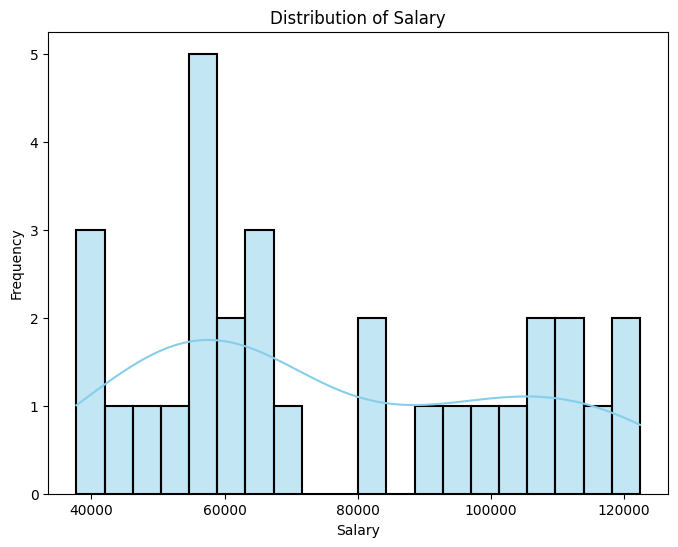

In [37]:
# Histogram to visualize the distribution of 'Salary'
plt.figure(figsize=(8, 6))
sns.histplot(df['Salary'], bins=20, kde=True, color='skyblue', edgecolor='black', linewidth=1.5)
plt.title('Distribution of Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

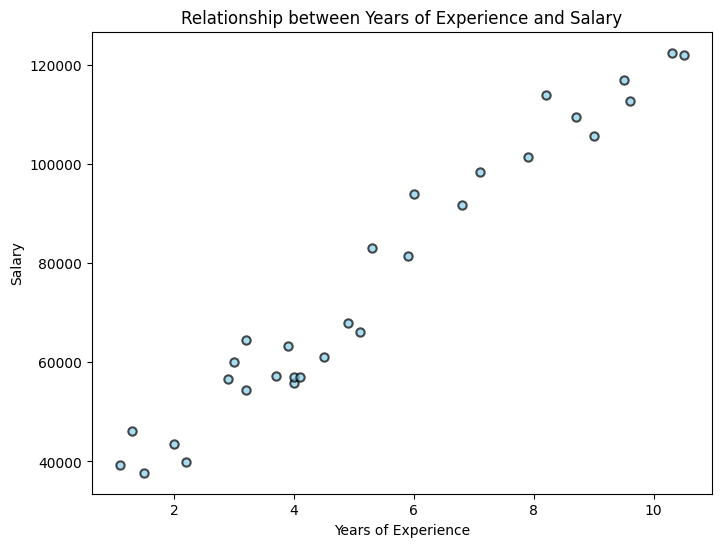

In [38]:
#scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='YearsExperience', y='Salary', data=df, color='skyblue', edgecolor='black', linewidth=1.5, alpha=0.7)
plt.title('Relationship between Years of Experience and Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

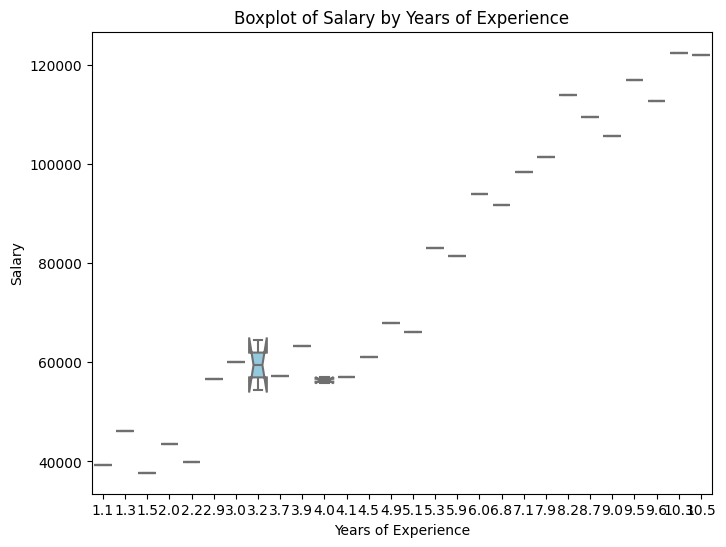

In [39]:
#boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='YearsExperience', y='Salary', data=df, color='skyblue', linewidth=1.5, fliersize=5, notch=True)
plt.title('Boxplot of Salary by Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

<ipython-input-40-2e56a4e1e4b3>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df['Salary'], fill=True, color='skyblue', linewidth=1.5, alpha=0.7, bw_adjust=0.5, label='Salary', shade=True)


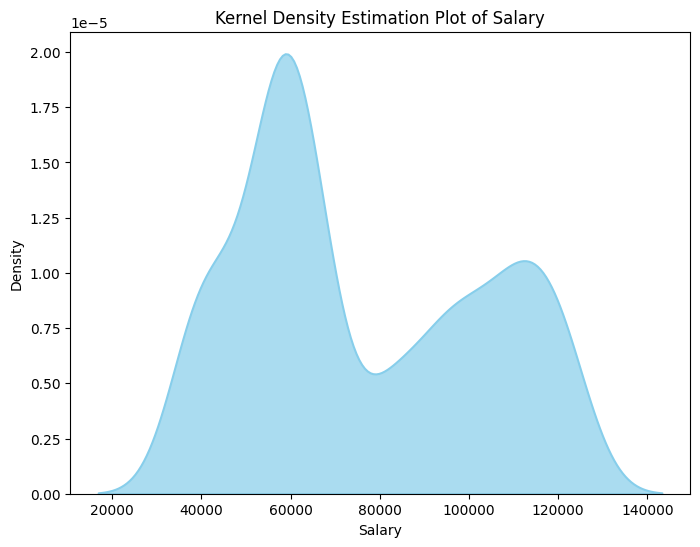

In [40]:
#kde plot
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df['Salary'], fill=True, color='skyblue', linewidth=1.5, alpha=0.7, bw_adjust=0.5, label='Salary', shade=True)
plt.title('Kernel Density Estimation Plot of Salary')
plt.xlabel('Salary')
plt.ylabel('Density')
plt.show()

<ipython-input-41-9878480f5db8>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='YearsExperience', y='Salary', data=df, color='skyblue', edgecolor='black', linewidth=1.5, alpha=0.7, ci=None)


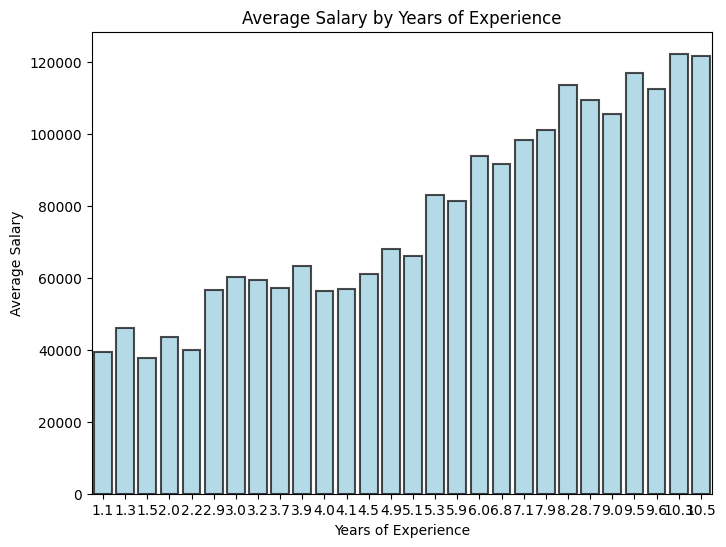

In [41]:
#Barchart
plt.figure(figsize=(8, 6))
sns.barplot(x='YearsExperience', y='Salary', data=df, color='skyblue', edgecolor='black', linewidth=1.5, alpha=0.7, ci=None)
plt.title('Average Salary by Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Average Salary')
plt.show()

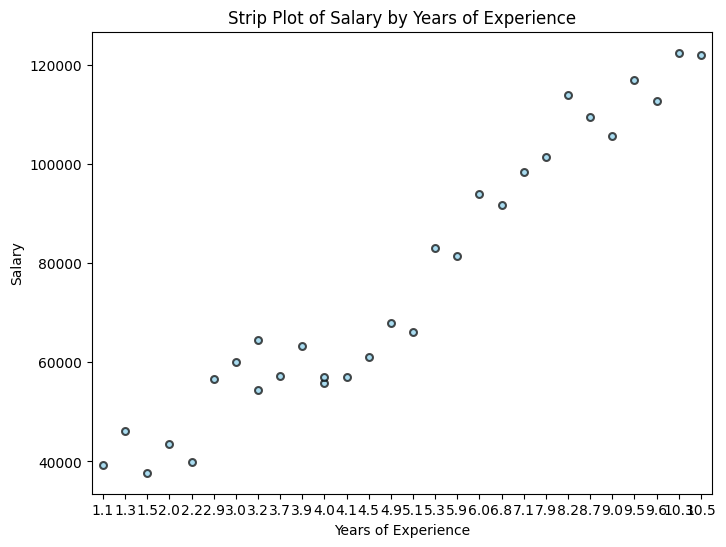

In [43]:
#strip plot
plt.figure(figsize=(8, 6))
sns.stripplot(x='YearsExperience', y='Salary', data=df, size=5, color='skyblue', edgecolor='black', linewidth=1.5, jitter=0, alpha=0.7, dodge=True)
plt.title('Strip Plot of Salary by Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

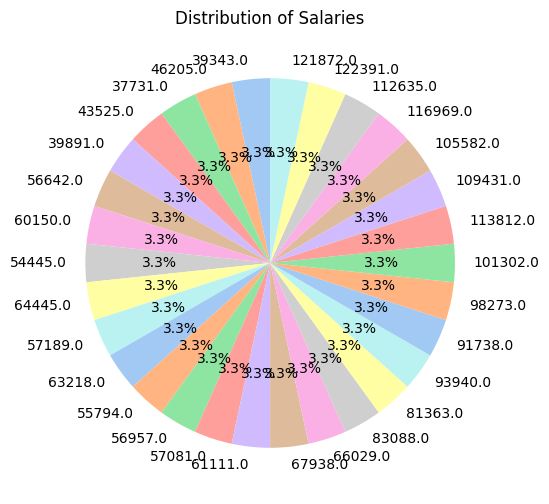

In [44]:
#pie chart
plt.figure(figsize=(8, 6))
salary_counts = df['Salary'].value_counts()
plt.pie(salary_counts, labels=salary_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Distribution of Salaries')
plt.show()

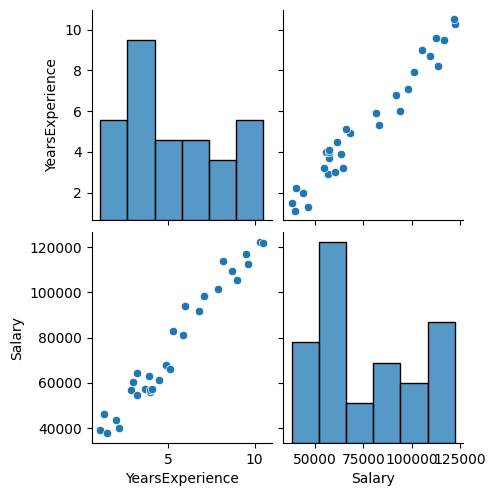

In [45]:
sns.pairplot(df)

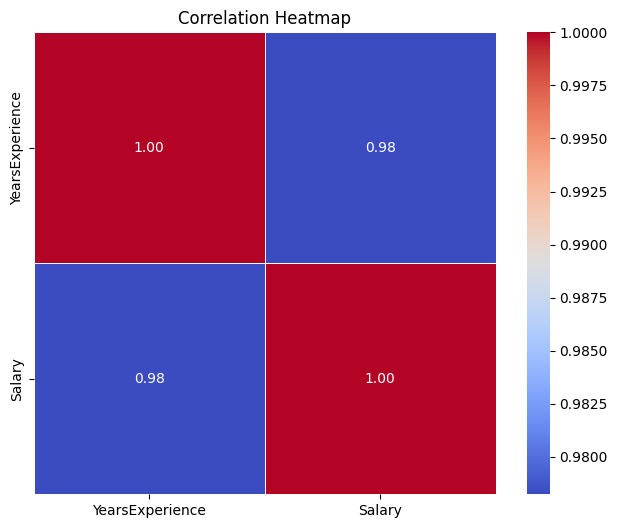

In [47]:
#heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5, linecolor='white', fmt='.2f', square=True, cbar=True)
plt.title('Correlation Heatmap')
plt.show()


In [48]:
#handling missing value
df.isnull().sum()

,0
YearsExperience,0
Salary,0


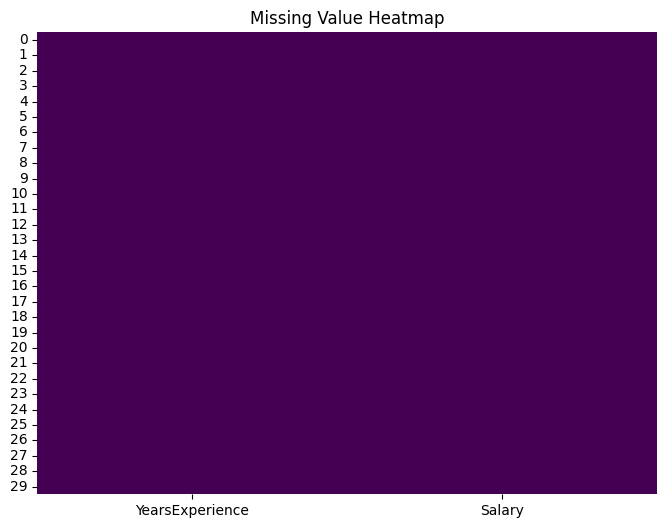

In [49]:
#mssing value heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Value Heatmap')
plt.show()


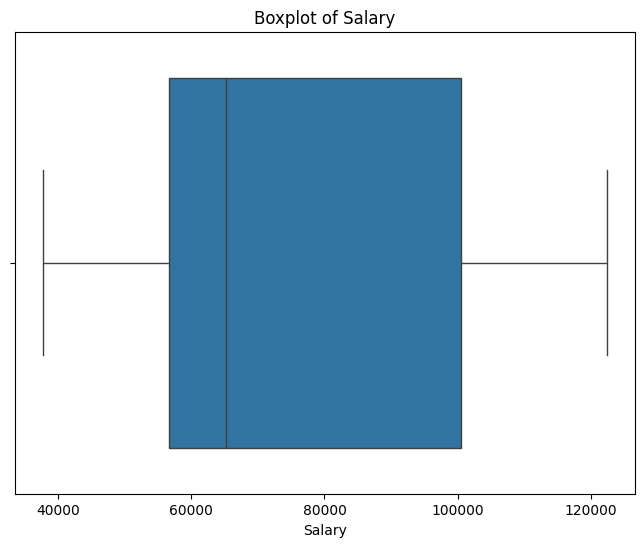

In [50]:
#checkig outlier
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Salary'])
plt.title('Boxplot of Salary')
plt.xlabel('Salary')
plt.show()

In [51]:
#normalization
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df_normalized=scaler.fit_transform(df)
print(df_normalized)

[[0.         0.01904087]
 [0.0212766  0.1000945 ]
 [0.04255319 0.        ]
 [0.09574468 0.06843846]
 [0.11702128 0.02551382]
 [0.19148936 0.22337586]
 [0.20212766 0.26481219]
 [0.22340426 0.19742499]
 [0.22340426 0.31554453]
 [0.27659574 0.229837  ]
 [0.29787234 0.30105126]
 [0.30851064 0.21335932]
 [0.30851064 0.22709662]
 [0.31914894 0.2285613 ]
 [0.36170213 0.27616348]
 [0.40425532 0.35680369]
 [0.42553191 0.33425467]
 [0.44680851 0.53575478]
 [0.5106383  0.51537916]
 [0.5212766  0.66393811]
 [0.60638298 0.63792818]
 [0.63829787 0.7151193 ]
 [0.72340426 0.75089771]
 [0.75531915 0.89866525]
 [0.80851064 0.84691708]
 [0.84042553 0.80145287]
 [0.89361702 0.93595559]
 [0.90425532 0.88476258]
 [0.9787234  1.        ]
 [1.         0.9938696 ]]


In [52]:
#scale
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df)
print(df_scaled)

[[-1.51005294 -1.36011263]
 [-1.43837321 -1.10552744]
 [-1.36669348 -1.419919  ]
 [-1.18749416 -1.20495739]
 [-1.11581443 -1.33978143]
 [-0.86493538 -0.71830716]
 [-0.82909552 -0.58815781]
 [-0.75741579 -0.79981746]
 [-0.75741579 -0.42881019]
 [-0.57821647 -0.69801306]
 [-0.50653674 -0.47433279]
 [-0.47069688 -0.74976858]
 [-0.47069688 -0.70662043]
 [-0.43485702 -0.70201994]
 [-0.29149756 -0.55250402]
 [-0.1481381  -0.29921736]
 [-0.07645838 -0.37004264]
 [-0.00477865  0.26285865]
 [ 0.21026054  0.19885989]
 [ 0.2461004   0.66547573]
 [ 0.53281931  0.58377993]
 [ 0.6403389   0.82623317]
 [ 0.92705781  0.93861127]
 [ 1.03457741  1.40274136]
 [ 1.21377673  1.24020308]
 [ 1.32129632  1.09740238]
 [ 1.50049564  1.51986835]
 [ 1.5363355   1.3590738 ]
 [ 1.78721455  1.72102849]
 [ 1.85889428  1.70177321]]


In [55]:
# Separate features (X) and target (y)
X = df[['YearsExperience']]
y=df['Salary']
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(X_train_scaled)
print(X_test_scaled)



[[ 1.77445774]
 [ 1.21912622]
 [-0.41216011]
 [-1.41869849]
 [-1.03690807]
 [-0.03036969]
 [-0.79395053]
 [-0.37745189]
 [-0.41216011]
 [ 0.94146047]
 [-1.34928205]
 [-1.27986561]
 [ 1.32325088]
 [-1.10632451]
 [ 0.66379471]
 [ 1.49679198]
 [ 0.24729607]
 [ 1.84387418]
 [ 0.55967005]
 [-0.68982587]
 [-0.44686833]
 [-0.23861901]
 [ 0.28200429]
 [-0.75924231]]
[[ 1.5315002 ]
 [-0.09978613]
 [ 1.04558513]
 [ 0.03904675]
 [-0.68982587]
 [-0.51628477]]


In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

In [70]:
# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Support Vector Machine": SVR()
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name}:")
    print(f"  Mean Squared Error: {mse:.2f}")
    print(f"  R-squared: {r2:.2f}")
    print("-" * 20)

Linear Regression:
  Mean Squared Error: 49830096.86
  R-squared: 0.90
--------------------
Decision Tree:
  Mean Squared Error: 101047709.83
  R-squared: 0.80
--------------------
Random Forest:
  Mean Squared Error: 56259364.81
  R-squared: 0.89
--------------------
Support Vector Machine:
  Mean Squared Error: 952217496.88
  R-squared: -0.86
--------------------


In [71]:
#logistic regression
median_salary = df['Salary'].median()
df['SalaryCategory'] = df['Salary'].apply(lambda x: 1 if x > median_salary else 0)  # 1 for high, 0 for low
# Separate features (X) and target (y)
X=df[['YearsExperience']]
y=df['SalaryCategory']
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


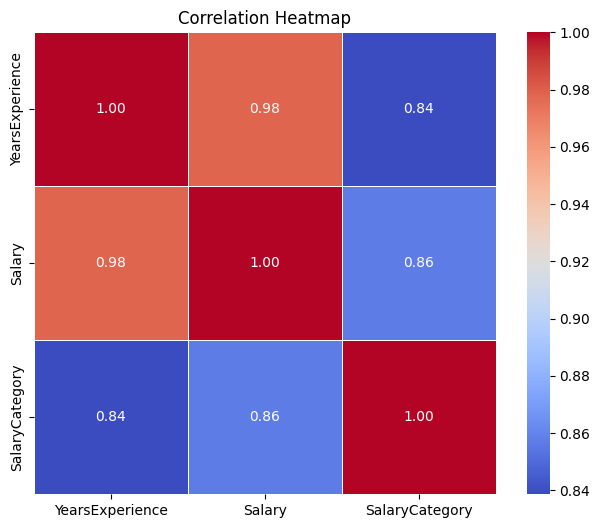

In [73]:
# Initialize and train the model logistic
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
#evalute the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5, linecolor='white', fmt='.2f', square=True, cbar=True)
plt.title('Correlation Heatmap')
plt.show()


Text(0.5, 1.0, 'Receiver Operating Characteristic (ROC) Curve')

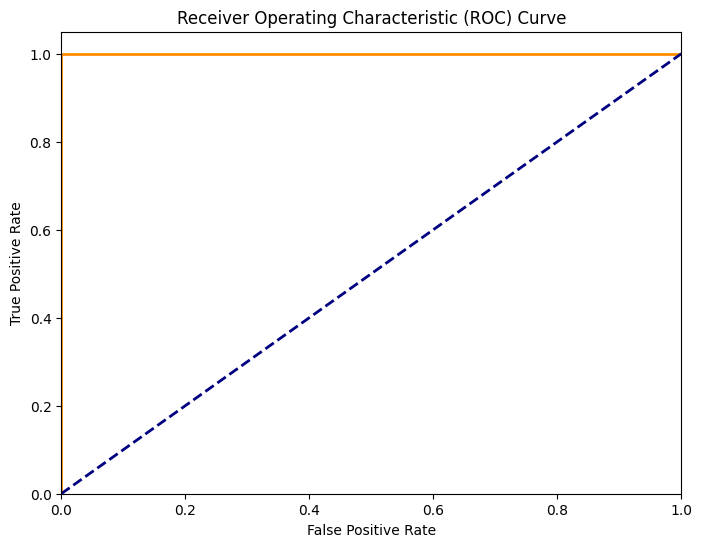

In [74]:
#roc plot
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')

In [79]:
#log loss curve
from sklearn.metrics import log_loss
log_loss_value = log_loss(y_test, y_pred)
print(f"Log Loss: {log_loss_value:.4f}")


Log Loss: 0.0000


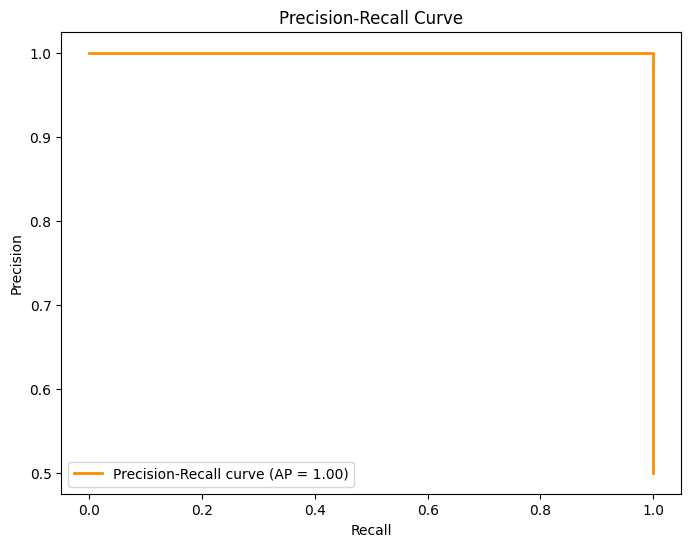

In [80]:
# prompt: #prescission recall curve plot

import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkorange', lw=2, label=f'Precision-Recall curve (AP = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()


In [81]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
YearsExperience,30.0,5.313333,2.837888,1.1,3.20,4.7,7.70,10.5
Salary,30.0,76003.000000,27414.429785,37731.0,56720.75,65237.0,100544.75,122391.0
SalaryCategory,30.0,0.500000,0.508548,0.0,0.00,0.5,1.00,1.0


Best Model Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Mean Squared Error: 0.00015000000000000026
R-squared: 0.9994
RandomForestRegressor()


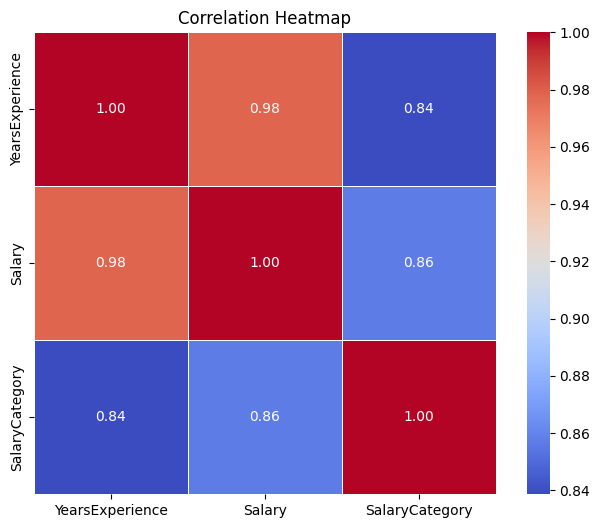

In [85]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5,10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
# Create GridSearchCV object
grid_search = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
# Fit the model
grid_search.fit(X_train, y_train)
# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Best Model Parameters:", best_params)
print("Mean Squared Error:", mse)
print("R-squared:", r2)
print(best_model)
#plot of gridsearchcv
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5, linecolor='white', fmt='.2f', square=True, cbar=True)
plt.title('Correlation Heatmap')
plt.show()



In [88]:
# Create a new DataFrame with the polynomial features, include the intercept column
df_poly = pd.DataFrame(X_poly, columns=['Intercept', 'YearsExperience', 'YearsExperience^2'])

# Concatenate the new features with the original DataFrame
# Only concatenate the 'YearsExperience^2' column
df = pd.concat([df, df_poly[['YearsExperience^2']]], axis=1)
print(df)

    YearsExperience    Salary  SalaryCategory  YearsExperience^2  \
0               1.1   39343.0               0               1.21   
1               1.3   46205.0               0               1.69   
2               1.5   37731.0               0               2.25   
3               2.0   43525.0               0               4.00   
4               2.2   39891.0               0               4.84   
5               2.9   56642.0               0               8.41   
6               3.0   60150.0               0               9.00   
7               3.2   54445.0               0              10.24   
8               3.2   64445.0               0              10.24   
9               3.7   57189.0               0              13.69   
10              3.9   63218.0               0              15.21   
11              4.0   55794.0               0              16.00   
12              4.0   56957.0               0              16.00   
13              4.1   57081.0               0   

In [90]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
YearsExperience,30.0,5.313333,2.837888,1.10,3.20,4.70,7.70,10.50
Salary,30.0,76003.000000,27414.429785,37731.00,56720.75,65237.00,100544.75,122391.00
SalaryCategory,30.0,0.500000,0.508548,0.00,0.00,0.50,1.00,1.00
YearsExperience^2,30.0,36.016667,33.785129,1.21,10.24,22.13,59.41,110.25
YearsExperience^2,30.0,36.016667,33.785129,1.21,10.24,22.13,59.41,110.25
